In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#import du dataset de 2015
df1 = pd.read_csv(r"C:\Users\sesa638933\Desktop\OC\P3\Pélec_zeff_jonas\archive\2015-building-energy-benchmarking.csv")
df1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
#import du dataset de 2016
df2 = pd.read_csv(r"C:\Users\sesa638933\Desktop\OC\P3\Pélec_zeff_jonas\archive\2016-building-energy-benchmarking.csv")
df2.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
#Définition d'une méthode pour l'identification des différences de colonnes entre les 2 datasets
def compare_columns(df1,df2):
    columns_1 = list(df1.columns) 
    columns_2 = list(df2.columns)
    same_columns=[]
    diff_columns_2=[]
    diff_columns_1=[]

    for col in columns_2:
        if col in columns_1:
            same_columns.append(col)
        else:
            diff_columns_2.append(col)
    for col in columns_1:
        if col not in columns_2:
            diff_columns_1.append(col)
    return diff_columns_1, diff_columns_2


In [5]:
#Utilisation de la méthode
diff_df1, diff_df2 = compare_columns(df1,df2)
diff_df1

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [6]:
diff_df2

['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [7]:
#exploration des données concaténées dans la variable "Location"
df1['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [8]:
import ast
#déconcaténer les données de localisation de la variable "Location"
df1['Location'] = [ast.literal_eval(str(item)) for index, item in df1.Location.items()]
df1 = pd.concat([df1.drop(['Location'], axis=1), df1['Location'].apply(pd.Series)], axis=1)
df1['human_address'] = [ast.literal_eval(str(item)) for index, item in df1.human_address.items()]
df1 = pd.concat([df1.drop(['human_address'], axis=1), df1['human_address'].apply(pd.Series)], axis=1)
df1.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [9]:
#Standardisation des nouvelles variables liées à la localisation de 2015 par rapport aux noms des variables de 2016
df1 = df1.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [10]:
diff_df1, diff_df2 = compare_columns(df1,df2)
diff_df1

['OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [11]:
diff_df2

['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [12]:
#comparaison des ordres de grandeur des 2 datasets pour une même variable
print(f"Description de la variable TotalGHGEmissions 2016 : \n\n",df2['TotalGHGEmissions'].describe(),
     f"\n\nDescription de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n", df1['GHGEmissions(MetricTonsCO2e)'].describe())

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


In [13]:
#Il semble qu'il s'agit bien des mêmes variables
#Standardisation des noms des variables
df1 = df1.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})
df1.drop(['OtherFuelUse(kBtu)','2010 Census Tracts',
                'Seattle Police Department Micro Community Policing Plan Areas',
                'City Council Districts','SPD Beats', 'Zip Codes'], axis=1, inplace=True)

In [14]:
print(diff_df1,diff_df2)

['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes'] ['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


In [15]:
#Concaténation des 2 datasets au sein d'un seul df
df = pd.concat([df1,df2], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
df.shape

(6716, 46)

In [16]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,DefaultData,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,No,NaN,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,No,NaN,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,No,NaN,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [17]:
#Observation des valeurs possibles pour la variable "BuildingType"
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [18]:
#Comme il est précisé dans le projet, seuls les bâtiments non destinés à l'habitation seront étudiés
#Drop des bâtiments destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [19]:
#Création d'un df avec les moyennes des variables numériques de 2015 et 2016
mean_columns = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
                'PropertyGFAParking', 'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
                'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']
OSEBuilding_means = df[['OSEBuildingID']+mean_columns].groupby('OSEBuildingID').mean()
OSEBuilding_means.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,...,182.050000,7103895.25,7277224.50,2.013457e+06,1.118411e+06,3816093.5,12744.264650,1274420.5,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,...,187.299997,8371084.00,8715133.50,0.000000e+00,1.047494e+06,3574131.0,47970.408205,4797033.5,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,...,245.300003,72858840.00,74721692.00,2.061348e+07,1.454968e+07,49644549.5,26018.500000,2601850.0,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,...,433.600000,17511952.00,17655122.25,1.283648e+07,8.115232e+05,2768973.5,19065.565430,1906553.5,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,...,221.350003,14500852.50,14867373.00,0.000000e+00,1.675645e+06,5717426.0,87835.492190,8783551.5,506.355,3.450


In [20]:
#Suppression des doublons pour la variable "OSEBuildingID"
duplicate_building = df.drop_duplicates(subset=['OSEBuildingID'], keep='last')
duplicate_building.drop(mean_columns, axis=1, inplace=True)
df = pd.merge(duplicate_building, OSEBuilding_means, how='left', on='OSEBuildingID')

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
df.shape

(1698, 46)

In [22]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03,1698.000000,1.698000e+03,1.686000e+03,...,1697.000000,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1697.000000,1697.000000
mean,16339.776207,2015.982332,4.369258,1961.704947,1.148704,4.101885,1.183777e+05,13421.728504,1.049560e+05,9.887040e+04,...,179.240719,8.457072e+06,8.121502e+06,5.133132e+05,1.719086e+06,5.865634e+06,1.971806e+04,1.971806e+06,185.235053,1.501859
std,13811.042261,0.131780,2.191411,32.850343,2.810159,6.516620,2.951875e+05,42938.707728,2.806832e+05,2.757407e+05,...,183.519181,3.010387e+07,2.204160e+07,5.351773e+06,6.064506e+06,2.069226e+07,9.400898e+04,9.400898e+06,745.538021,2.266608
min,1.000000,2015.000000,1.000000,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,6.455000e+03,...,-2.050000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.120000,0.000000
25%,584.250000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.939250e+04,0.000000,2.833200e+04,2.548025e+04,...,80.699999,1.215360e+06,1.334535e+06,0.000000e+00,2.147724e+05,7.328030e+05,0.000000e+00,0.000000e+00,20.150000,0.275000
50%,21161.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.926600e+04,0.000000,4.739150e+04,4.348400e+04,...,135.100003,2.555917e+06,2.715609e+06,0.000000e+00,4.833343e+05,1.649172e+06,4.974220e+03,4.974050e+05,50.215000,0.785000
75%,24601.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.068380e+05,0.000000,9.524950e+04,9.198825e+04,...,208.650002,6.960904e+06,7.302520e+06,0.000000e+00,1.427589e+06,4.871044e+06,1.507799e+04,1.507822e+06,139.630000,1.765000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,2620.000000,8.739237e+08,4.716139e+08,1.314066e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   int64  
 1   DataYear                         1698 non-null   int64  
 2   BuildingType                     1698 non-null   object 
 3   PrimaryPropertyType              1698 non-null   object 
 4   PropertyName                     1698 non-null   object 
 5   TaxParcelIdentificationNumber    1698 non-null   object 
 6   CouncilDistrictCode              1698 non-null   int64  
 7   Neighborhood                     1698 non-null   object 
 8   YearBuilt                        1698 non-null   int64  
 9   ListOfAllPropertyUseTypes        1690 non-null   object 
 10  LargestPropertyUseType           1686 non-null   object 
 11  SecondLargestPropertyUseType     866 non-null    object 
 12  ThirdLargestProperty

In [24]:
#suppression des variables inutiles ou redondantes pour notre analyse
useless = ['NaturalGas(therms)','SiteEnergyUseWN(kBtu)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kWh)']
df.drop(useless, axis=1, inplace=True)

In [25]:
#Suppression des lignes avec des valeurs nulles pour les 2 variables à prédire
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [26]:
#suppression des variables inutiles pour notre analyse
df.drop("Comments", axis=1, inplace=True)

In [27]:
#Suppression des lignes mentionnant les outliers car nous ne savons pas à quoi ils correspondent
df = df[~df["Outlier"].isnull()==False]
df.drop('Outlier', axis=1, inplace=True)

In [28]:
df.PrimaryPropertyType.unique()

array(['Retail Store', 'Small- and Mid-Sized Office', 'Large Office',
       'Non-Refrigerated Warehouse', 'Medical Office', 'Other',
       'K-12 School', 'Worship Facility', 'Restaurant\n',
       'Mixed Use Property', 'Hotel', 'University',
       'Self-Storage Facility', 'Warehouse', 'Senior Care Community',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Low-Rise Multifamily', 'Restaurant',
       'Office'], dtype=object)

In [29]:
#Filtre sur la variable PrimaryPropertyType
df=df[df['PrimaryPropertyType']!='RESIDENCE_HALL']
df=df[df['PrimaryPropertyType']!='LOW_RISE_MULTIFAMILY']

In [30]:
#Filtre sur la variable LargestpropertyUseType
df = df[df['LargestPropertyUseType'].str.contains('housing',case=False)==False]

### Analyse exploratoire

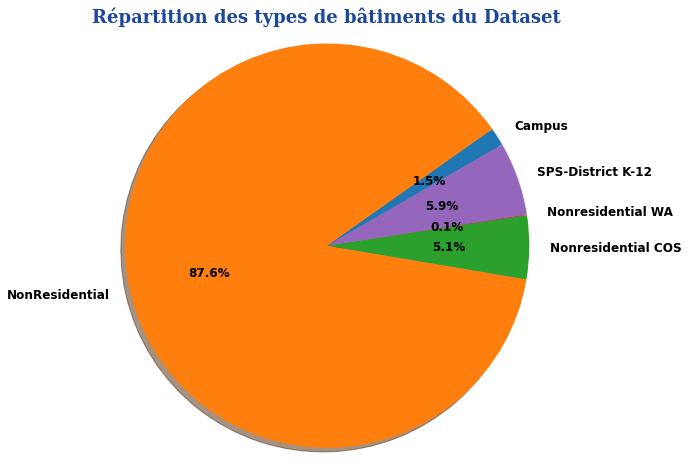

In [31]:
#Pie chart des types de bâtiments qu'on étudie
building_type = df.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

In [32]:
#Cateories présentent au sein des types de bâtiments "NonResidential" (=la majorité des bâtiments)
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    288
Other                          188
Warehouse                      180
Large Office                   168
Mixed Use Property              92
Retail Store                    90
Hotel                           74
Worship Facility                69
Distribution Center             51
Medical Office                  41
Supermarket / Grocery Store     40
K-12 School                     39
Self-Storage Facility           27
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Laboratory                      10
Restaurant                      10
Hospital                        10
Restaurant\n                     1
Non-Refrigerated Warehouse       1
Name: PrimaryPropertyType, dtype: int64

In [33]:
#Suppression des doublons avec un caractère d'échappement
import re
regex = re.compile(r'[\n\r\t]')
df['PrimaryPropertyType'] = [regex.sub("", item) for index, item in df.PrimaryPropertyType.iteritems()]
df.loc[(df['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    288
Other                          188
Warehouse                      180
Large Office                   168
Mixed Use Property              92
Retail Store                    90
Hotel                           74
Worship Facility                69
Distribution Center             51
Medical Office                  41
Supermarket / Grocery Store     40
K-12 School                     39
Self-Storage Facility           27
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Non-Refrigerated Warehouse       1
Name: PrimaryPropertyType, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 1697
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1655 non-null   int64  
 1   DataYear                         1655 non-null   int64  
 2   BuildingType                     1655 non-null   object 
 3   PrimaryPropertyType              1655 non-null   object 
 4   PropertyName                     1655 non-null   object 
 5   TaxParcelIdentificationNumber    1655 non-null   object 
 6   CouncilDistrictCode              1655 non-null   int64  
 7   Neighborhood                     1655 non-null   object 
 8   YearBuilt                        1655 non-null   int64  
 9   ListOfAllPropertyUseTypes        1655 non-null   object 
 10  LargestPropertyUseType           1655 non-null   object 
 11  SecondLargestPropertyUseType     849 non-null    object 
 12  ThirdLargestProperty

Les bureaux de petite et moyenne taille représentent la plus grande part des bâtiments non résidentiels.


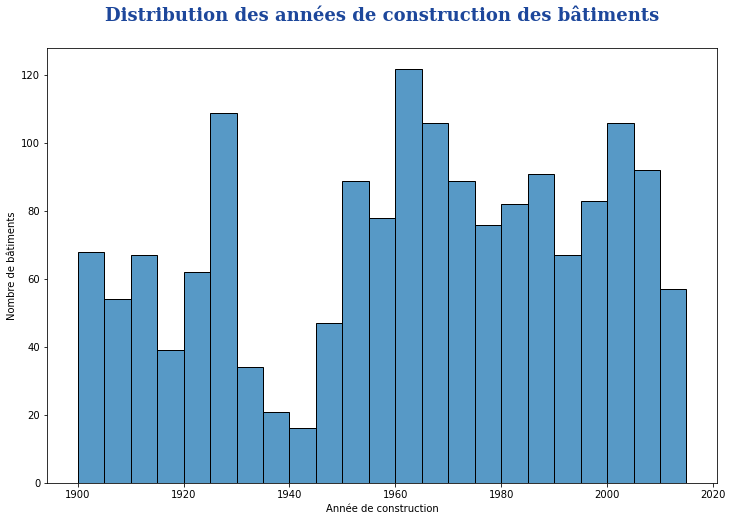

In [35]:
#Histogramme de la distribution des bâtiments en fonction de l'année de construction
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

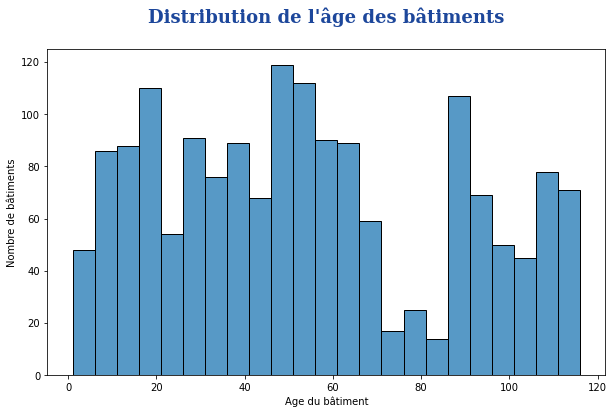

In [36]:
#Creation de la variable âge du bâtiment
df['BuildingAge'] = df['DataYear'] - df['YearBuilt']
#Suppression de la variable "YearBuilt"
df.drop('YearBuilt', axis=1, inplace=True)
#Histogramme de la distribution des bâtiments selon leur âge
fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

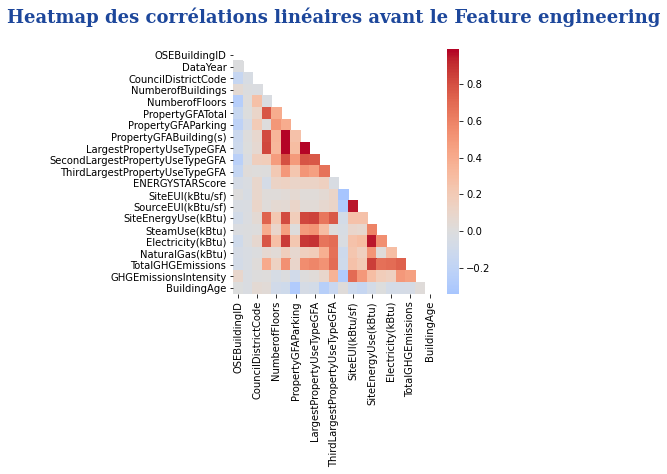

In [37]:
#Heatmap des corrélations linéaires
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(4.5,4.5))

ax = sns.heatmap(corr, annot=False, fmt=".2f", 
                mask=mask,center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires avant le Feature engineering\n", 
          fontdict=font_title)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 1 to 1697
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1655 non-null   int64  
 1   DataYear                         1655 non-null   int64  
 2   BuildingType                     1655 non-null   object 
 3   PrimaryPropertyType              1655 non-null   object 
 4   PropertyName                     1655 non-null   object 
 5   TaxParcelIdentificationNumber    1655 non-null   object 
 6   CouncilDistrictCode              1655 non-null   int64  
 7   Neighborhood                     1655 non-null   object 
 8   ListOfAllPropertyUseTypes        1655 non-null   object 
 9   LargestPropertyUseType           1655 non-null   object 
 10  SecondLargestPropertyUseType     849 non-null    object 
 11  ThirdLargestPropertyUseType      345 non-null    object 
 12  YearsENERGYSTARCerti

In [39]:
df.drop('Neighborhood', axis=1, inplace=True)

In [40]:
#Isolement des paires de variables avec des corrélations de Pearson supérieures à 0.7 pour éviter des problèmes de colinéarité
threshold = 10
corr_pairs = corr.unstack()
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)]).reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr

,level_0,level_1,corr_coeff


In [41]:
#Création de nouvelles variables pour tenter de gommer les corrélations linéaires notamment pour les variables suffixées "GFA" qui sont très fortes
def split_words(df, column = None):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

list_use_type = split_words(df, 'ListOfAllPropertyUseTypes')
print("Nombre de type d'usages dans la base : {}".format(len(list_use_type)))

Nombre de type d'usages dans la base : 116


In [42]:
#Création d'une variable nous donnant le nombre total d'usages du bâtiment, puis suppression la liste complète des usages
df['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in df['ListOfAllPropertyUseTypes'].str.split(',')]
df.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

In [43]:
#Méthode pour return les variables selon un suffix donné
def search_componant(df, suffix=None):
  componant = []
  for col in df.columns:
      if suffix in col: 
        componant.append(col)
  return componant

In [44]:
gfa_features = search_componant(df, suffix='GFA')
df[['TotalUseTypeNumber'] + gfa_features].head(10)

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1,1,98370.0,25920.0,72450.0,98370.0,NaN,NaN
2,5,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0
3,2,76598.0,21410.0,55188.0,55188.0,21410.0,NaN
4,2,186971.0,0.0,186971.0,186977.0,115477.0,NaN
6,2,434475.0,250000.0,184475.0,434475.0,250000.0,NaN
7,2,192960.0,32160.0,160800.0,135173.0,32000.0,NaN
9,3,83448.0,15479.0,67969.0,42527.0,27961.0,529.0
11,1,28568.0,0.0,28568.0,28568.0,NaN,NaN
12,1,21633.0,0.0,21633.0,10400.0,NaN,NaN
13,2,23696.0,0.0,23696.0,23829.0,0.0,NaN


In [45]:
#convertion des différentes surfaces (Buildings et Parking) en pourcentage de la surface totale en supprimant les variables LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA
df['GFABuildingRate'] = (round((df['PropertyGFABuilding(s)'].fillna(0)
                                  /df['PropertyGFATotal'].fillna(0)),5))
df['GFAParkingRate'] = (round((df['PropertyGFAParking'].fillna(0)
                                 /df['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles
df.drop(['SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA',
           'PropertyGFAParking',
           'PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna("Unknown")
df['NumberofFloors'] = df['NumberofFloors'].fillna(1)

In [46]:
#Calcul de la surface moyenne par bâtiment et par étage 
df['GFAPerBuilding'] = round((df['PropertyGFATotal'] / df['NumberofBuildings']),3)
df['GFAPerFloor'] = round((df['PropertyGFATotal'] / df['NumberofFloors']),3)

In [47]:
#filtre sur les observations comprenant l'energy score
df=df.dropna(subset=['ENERGYSTARScore'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 1 to 1693
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1131 non-null   int64  
 1   DataYear                       1131 non-null   int64  
 2   BuildingType                   1131 non-null   object 
 3   PrimaryPropertyType            1131 non-null   object 
 4   PropertyName                   1131 non-null   object 
 5   TaxParcelIdentificationNumber  1131 non-null   object 
 6   CouncilDistrictCode            1131 non-null   int64  
 7   LargestPropertyUseType         1131 non-null   object 
 8   SecondLargestPropertyUseType   521 non-null    object 
 9   YearsENERGYSTARCertified       98 non-null     object 
 10  DefaultData                    1131 non-null   object 
 11  ComplianceStatus               1131 non-null   object 
 12  Latitude                       1131 non-null   o

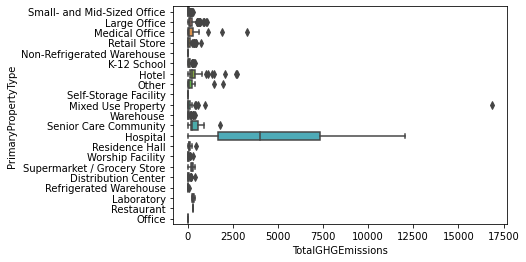

In [49]:
sns.boxplot(data=df,x='TotalGHGEmissions',y='PrimaryPropertyType')
plt.show()

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='PrimaryPropertyType'>

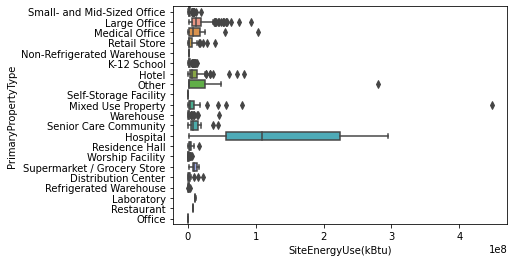

In [50]:
sns.boxplot(data=df,x='SiteEnergyUse(kBtu)',y='PrimaryPropertyType')

In [51]:
df.reset_index(drop=True,inplace=True)

In [52]:
df['PropertyGFATotal']=df['PropertyGFATotal'].apply(lambda x: float(x))

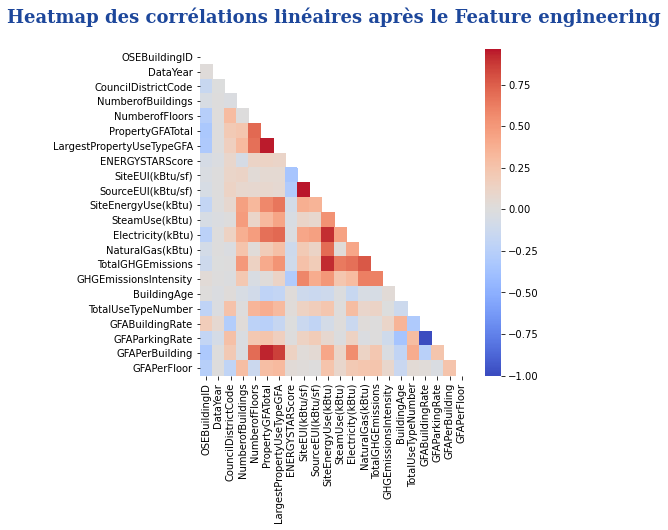

In [53]:
#Heatmap des corrélations linéaires après le feature engineering
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(corr, annot=False, fmt=".2f", 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires après le Feature engineering\n", 
          fontdict=font_title)
plt.show()


In [54]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
20,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),0.961689
18,LargestPropertyUseTypeGFA,PropertyGFATotal,0.953819
16,GFAPerBuilding,PropertyGFATotal,0.932774
14,TotalGHGEmissions,SiteEnergyUse(kBtu),0.918041
12,Electricity(kBtu),SiteEnergyUse(kBtu),0.911132
10,LargestPropertyUseTypeGFA,GFAPerBuilding,0.860022
8,TotalGHGEmissions,NaturalGas(kBtu),0.775072
6,PropertyGFATotal,NumberofFloors,0.712634
4,Electricity(kBtu),LargestPropertyUseTypeGFA,0.711551
2,NaturalGas(kBtu),SiteEnergyUse(kBtu),0.707245


In [55]:
#Vérification de multicolinéarité avec le VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

strong_corr_features = list(set(list(strong_corr['level_0'].values) + list(strong_corr['level_1'].values)))
X = df[strong_corr_features].replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]
vif_df[vif_df['VIF'] > 5]



,feature,VIF
0,SourceEUI(kBtu/sf),20.646223
1,TotalGHGEmissions,877.143299
2,GFAPerBuilding,11.776622
3,PropertyGFATotal,27.259182
4,SiteEUI(kBtu/sf),18.727836
6,LargestPropertyUseTypeGFA,17.658823
8,NaturalGas(kBtu),92.050654
9,SiteEnergyUse(kBtu),4774.786791
11,Electricity(kBtu),1507.010375


In [56]:
#Suppression des variables suffixées EUI(kBtu/sf) et de la variable GHGEmissionsIntensity
Eui_features = search_componant(df, suffix='EUI(kBtu/sf)') + ['GHGEmissionsIntensity']
df.drop(Eui_features, axis=1, inplace=True)

### Analyse des variables à prédire

In [57]:
df['TotalGHGEmissions'].describe()

count     1131.000000
mean       182.482927
std        801.622256
min          0.705000
25%         20.532500
50%         51.550000
75%        137.297500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

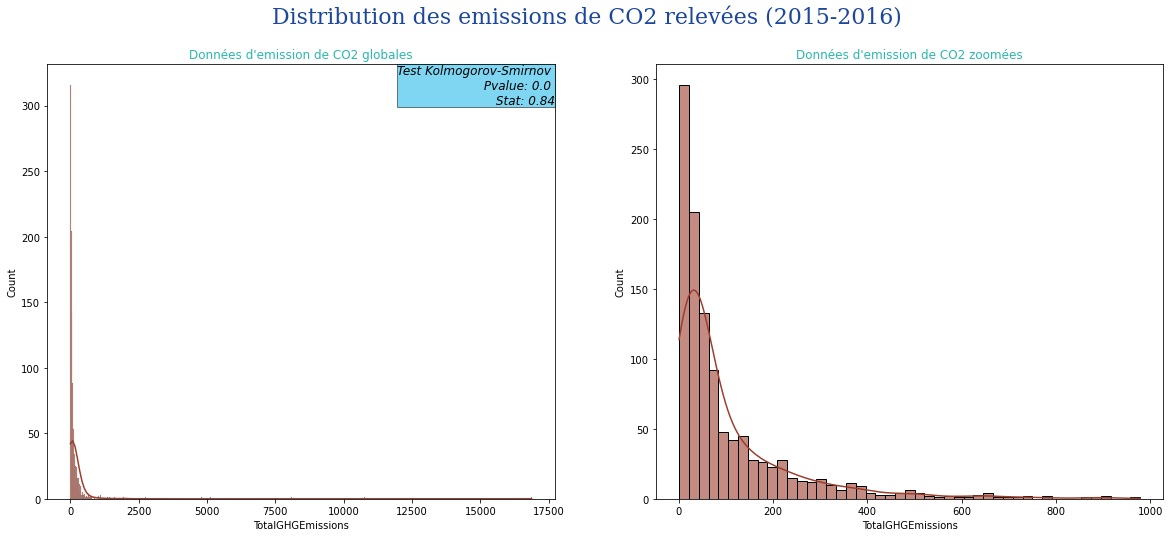

In [58]:
#Histogramme de la distribution des emissions de CO2 relevées (2015-2016)
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=df, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées", color='#2cb7b0')

plt.suptitle("Distribution des emissions de CO2 relevées (2015-2016)", 
             fontdict=font_title, fontsize=22)
plt.show()

<AxesSubplot:xlabel='TotalGHGEmissions'>

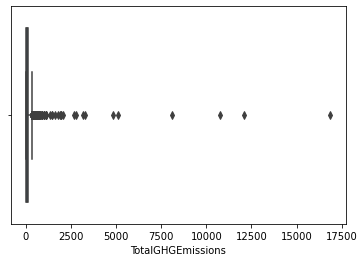

In [59]:
sns.boxplot(data=df,x='TotalGHGEmissions')

In [60]:
df['SiteEnergyUse(kBtu)'].describe()

count    1.131000e+03
mean     8.258387e+06
std      2.418720e+07
min      8.126790e+04
25%      1.320689e+06
50%      2.637037e+06
75%      7.319043e+06
max      4.483853e+08
Name: SiteEnergyUse(kBtu), dtype: float64

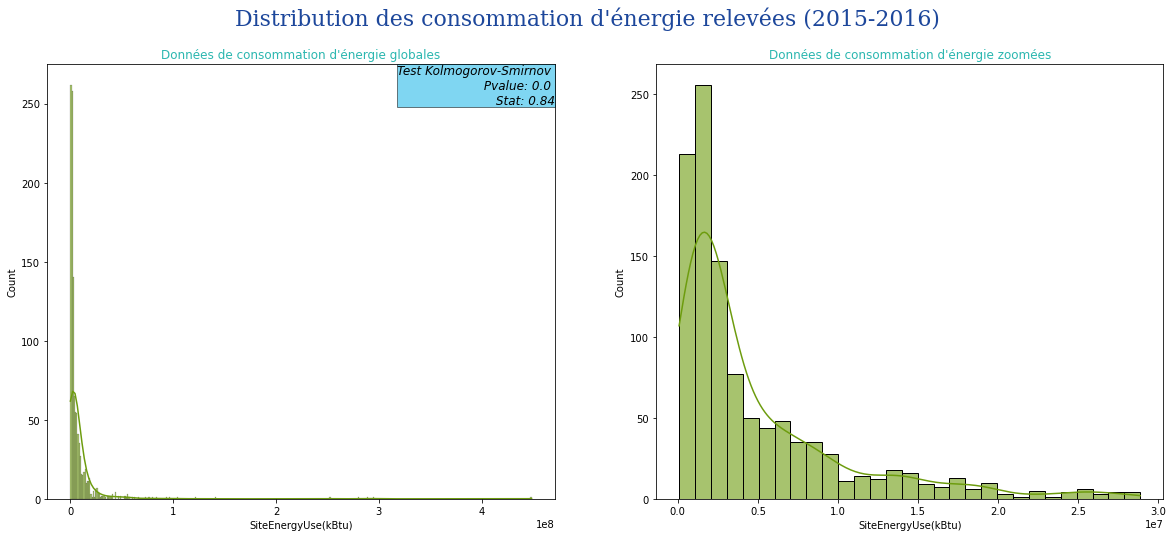

In [61]:
#Histogramme de la distribution des consommation d'énergie relevées (2015-2016)
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=df, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(df['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=df[(df['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées", color='#2cb7b0')

plt.suptitle("Distribution des consommation d'énergie relevées (2015-2016)", 
             fontdict=font_title, fontsize=22)
plt.show()


<AxesSubplot:xlabel='SiteEnergyUse(kBtu)'>

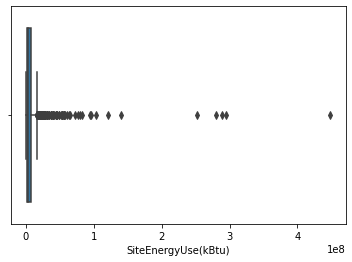

In [62]:
sns.boxplot(data=df,x='SiteEnergyUse(kBtu)')

Le test de Kolmogorov-Smirnov indique une p-value<0.05
On peut donc rejetter l'hypothèse de normalité des distributions de ces variables.

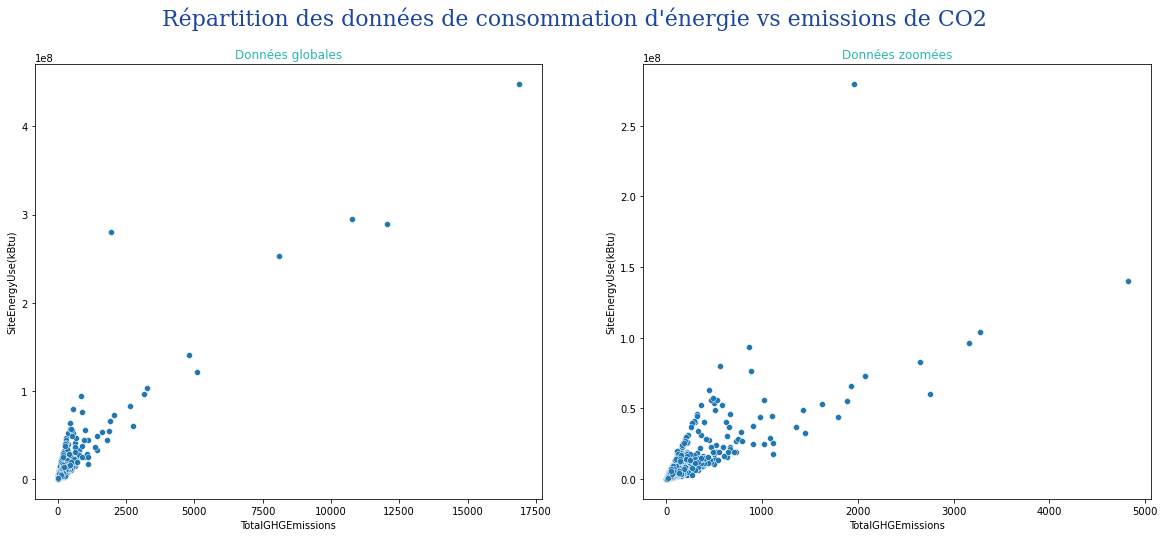

In [63]:
#Scatterplot de la distribution de ces 2 variables entre elles
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=df[(df['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", fontdict=font_title, fontsize=22)
plt.show()

In [64]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

#Méthode pour calculer la distance Harvesine entre chaque point de coordonnées et le centre de Seattle
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [65]:
#Calcul des distances du centre de Seattle pour chaque bâtiment
df['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(df.Latitude.astype(float), df.Longitude.astype(float))]

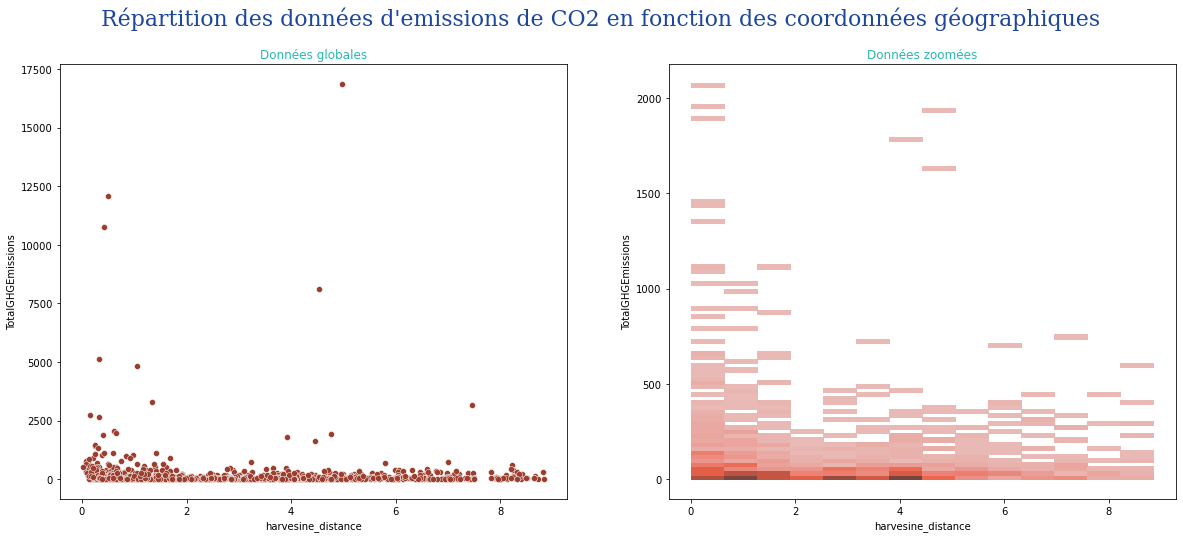

In [66]:
#Scatterplot de la répartition des données d'emissions de CO2 en fonction des coordonnées géographiques 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

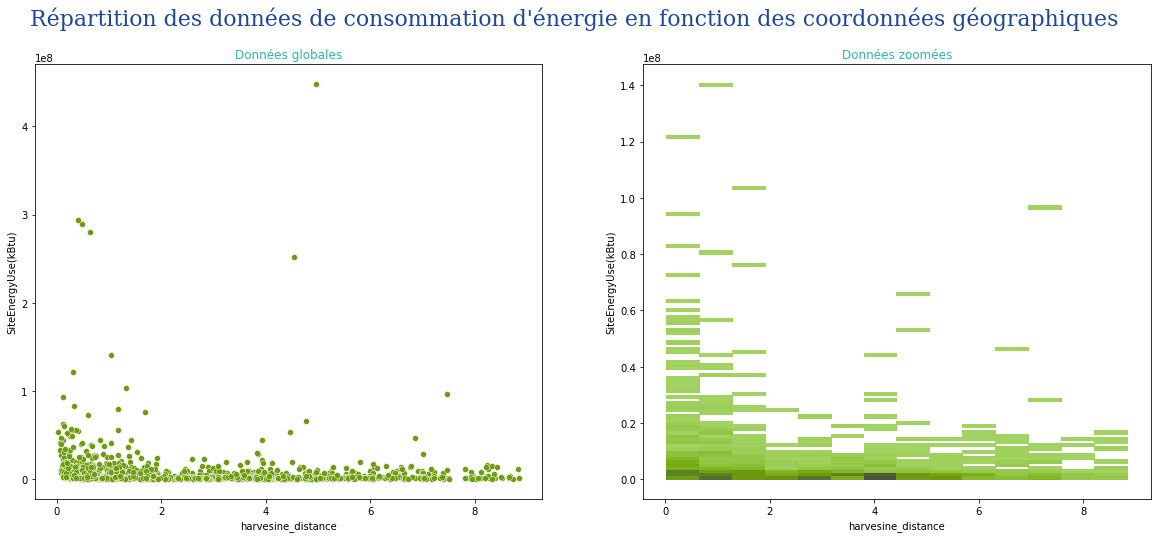

In [67]:
 fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=df, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.histplot(data=df[(df['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie en fonction des coordonnées géographiques", 
             fontdict=font_title, fontsize=22)
plt.show()

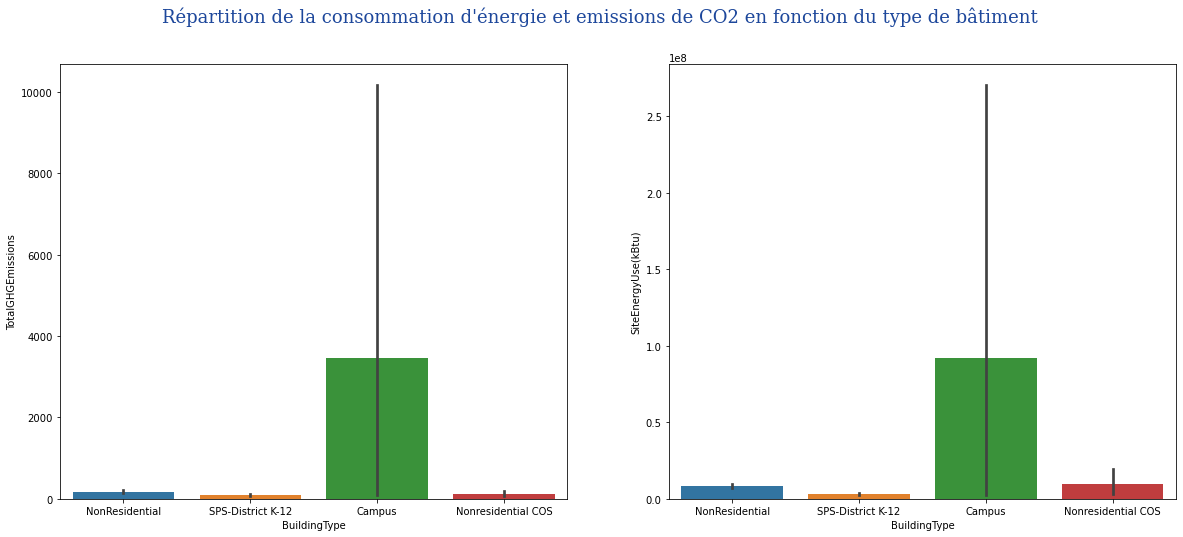

In [68]:
#Boxplot de la distribution de ces 2 variables en fonction du type de bâtiment
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

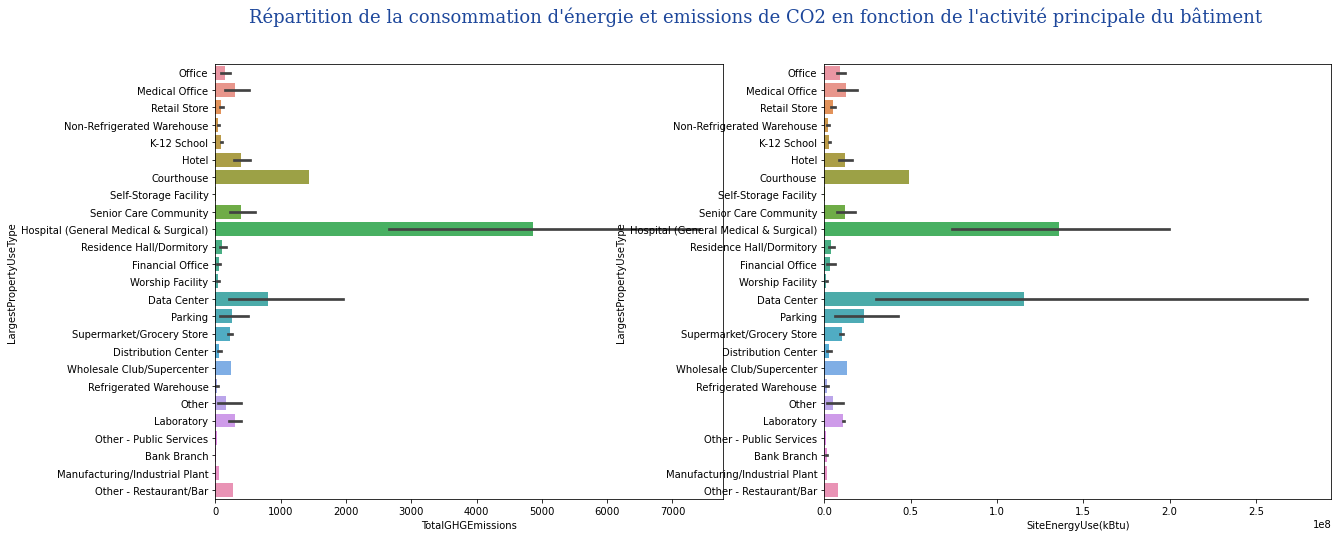

In [69]:
#Histogramme horizontal de la distribution de ces 2 variables en fonction de l'activité principale du bâtiment
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='TotalGHGEmissions',y='LargestPropertyUseType',data=df, ax=axes[0])
sns.barplot(x='SiteEnergyUse(kBtu)',y='LargestPropertyUseType',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction de l'activité principale du bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

C:\Users\sesa638933\Anaconda3\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


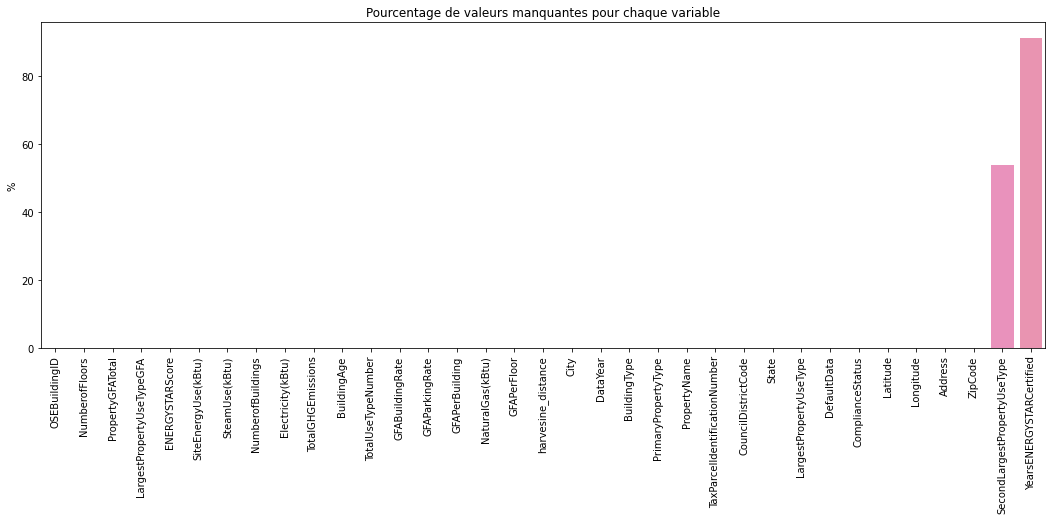

In [70]:
#On calcule la proportion de données manquantes pour chaque colonne et on plot !
fig = plt.figure(figsize=(18, 6))

null = df.isnull().sum(axis=0).sort_values()/len(df)*100
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()
    
    


In [71]:
#Isolons les valeurs connus
df = df[df.LargestPropertyUseType !='Unknown'] 

In [72]:
#transformation binaire de la catégorie 
df['IsHospital'] = np.where(df['LargestPropertyUseType']=='Hospital (General Medical & Surgical)', 1, 0)

In [73]:
df['txIsHospital'] = np.where(df['IsHospital']==1, df['LargestPropertyUseTypeGFA']/df['PropertyGFATotal'], 0)


In [74]:
sum(df['txIsHospital']>0)

10

Pour ces 2 variables les Campus ont des valeurs significativement supérieurs.

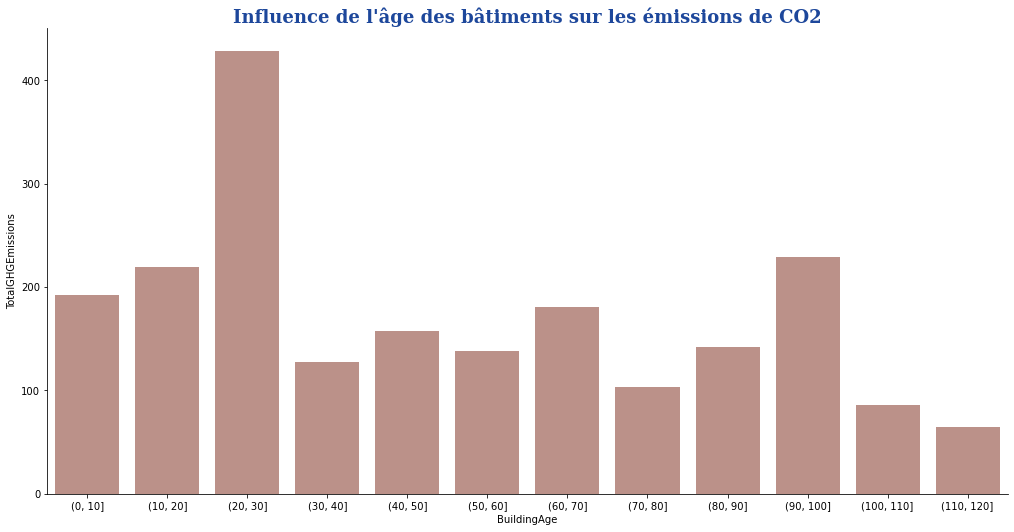

In [75]:
#Histogramme de la répartition des émissions de CO2 en fonction de l'âge du bâtiment
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="#9C3E2D", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title)
plt.show()

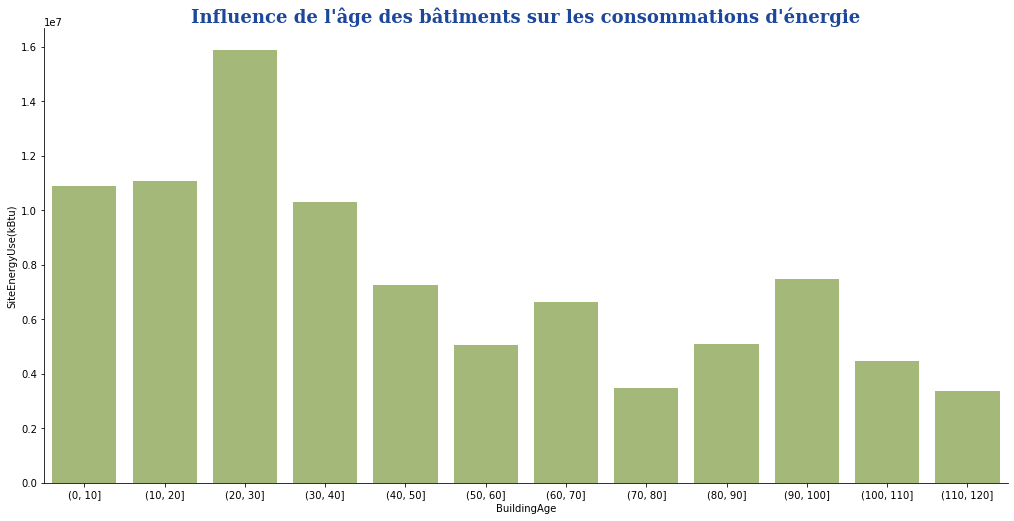

In [83]:
#Histogramme de la répartition des consommations en énérgie en fonction de l'âge du bâtiment
sns.catplot(
    data=df, kind="bar",
    x=pd.cut(df['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",
    ci=None, color="#6D9C0E", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie", fontdict=font_title)
plt.show()

Mis à part les bâtiments avec un âge d'entre 120 et 120 ans, les bâtiments de moins de 30 ans semblent avoir des consommations d'énergie et rejets de CO2 plus important que les buildings anciens.

In [ ]:
df.info()

In [ ]:
#Observons la variable ComplianceStatus qui représente la conformité des données relevées
df['ComplianceStatus'].unique()

In [ ]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(df[df['ComplianceStatus'] != "Compliant"].shape[0]))

In [ ]:
data = df[df['ComplianceStatus'] == "Compliant"]

In [ ]:
#Suppression des variables DefaultData, ComplianceStatus, TaxParcelIdentificationNumber, CouncilDistrictCode, 
#City car inutiles pour nos modélisations
data = data.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','CouncilDistrictCode'], axis=1)

In [ ]:
#Projection des établissements sur la carte de Seattle
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

In [ ]:
#exportation du fichier csv nettoyé
data = data.drop(['Latitude','Longitude'], axis=1)
data.set_index("OSEBuildingID").to_csv("building-energy-cleaned.csv")